In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import random

%matplotlib inline

In [2]:
files = [
    "dicts/normalized_encoded_horizon_dict_window90_bands30_odds3.json",
    "dicts/normalized_encoded_horizon_dict_window90_bands30_random_seed42.json",
    "dicts/normalized_encoded_horizon_dict_window90_bands45_odds3.json",
    "dicts/normalized_encoded_horizon_dict_window90_bands45_random_seed42.json",
    "dicts/normalized_encoded_horizon_dict_window90_bands60_odds3.json",
    "dicts/normalized_encoded_horizon_dict_window90_bands60_random_seed42.json"
]

In [3]:
for fi in files:
    with open(fi) as f:
        data = json.load(f)
    total_keys = 0
    total_values = 0
    for k,v in data.items():
        total_keys += 1
        total_values += len(v)
    print(fi)
    print(total_keys)
    print(total_values)
    print('average:', total_values/total_keys)
    print()

dicts/normalized_encoded_horizon_dict_window90_bands30_odds3.json
47720
360000
average: 7.5440067057837386

dicts/normalized_encoded_horizon_dict_window90_bands30_random_seed42.json
47032
360000
average: 7.654362986902535

dicts/normalized_encoded_horizon_dict_window90_bands45_odds3.json
146732
360000
average: 2.453452552953684

dicts/normalized_encoded_horizon_dict_window90_bands45_random_seed42.json
123765
360000
average: 2.9087383347473033

dicts/normalized_encoded_horizon_dict_window90_bands60_odds3.json
225373
360000
average: 1.5973519454415568

dicts/normalized_encoded_horizon_dict_window90_bands60_random_seed42.json
206177
360000
average: 1.746072549314424



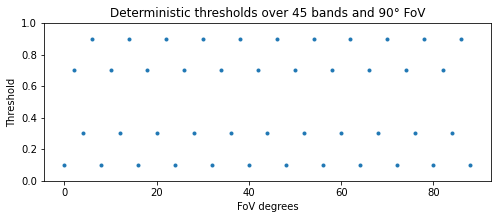

In [4]:
fig = plt.figure(figsize=(8,3))
plt.gcf().subplots_adjust(bottom=0.15)
window_size = 90
bands = 45
x = [int(x) for x in np.linspace(0, window_size, bands, endpoint=False)]
odds3 = [0.1, 0.7, 0.3, 0.9]*(bands//4)
odds3 += odds3[:bands%4]
plt.plot(x,odds3,".")
plt.title("Deterministic thresholds over 45 bands and 90° FoV")
plt.ylim(0,1)
plt.ylabel("Threshold")
plt.xlabel("FoV degrees")
plt.savefig("images/thresholds_deterministic.png")
plt.show()

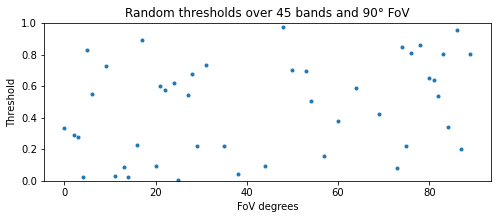

In [5]:
seed = 42
# generate the thresholds
random.seed(seed)
thresholds = [random.random() for i in range(bands)] # instead of range(window_size)
#thresholds = np.asarray(thresholds)
#thresholds *= 0.9 # to leave wiggle room at the top since we're doing "> threshold"
random.seed(seed)
indices = random.sample(range(window_size), bands)

fig = plt.figure(figsize=(8,3))
plt.gcf().subplots_adjust(bottom=0.15)
plt.plot(indices,thresholds,".")
plt.title("Random thresholds over 45 bands and 90° FoV")
plt.ylim(0,1)
plt.ylabel("Threshold")
plt.xlabel("FoV degrees")
plt.savefig("images/thresholds_random.png")
plt.show()